# Welcome to the jupyter notebook for Ro-Vibrational Spectrscopy!
### Created Fall 2022: J. A. DePaolo-Boisvert

In [1]:
# Importing Packages which are like collections of code that groups of people will find useful
# Some packages are widely known and applied while others can be much more niche
import numpy as np #invokes numpy commands with np.command()
import scipy as sp
import scipy.constants as cons #constants is a submodule of scipy that we want easy access to
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

def plot_data(title, xs, ys, xlabel, ylabel):
    plt.clf()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    _ = plt.plot(xs, ys)
    plt.show()

In [2]:
#Defining Constants
h = cons.Planck
kb = cons.Boltzmann
c = cons.c
amutokg = 1.66E-27
evtojoule = 1.602176634E-19 #Multiplicative conversions
temp = 300

In [3]:
#Define the diatomic molecule here
mass1 = 1.007825 *amutokg
mass2 = 35.968853 *amutokg
#H=1.007825, D=2.014102, Cl(35)=34.968853, and Cl(37)=36.965903

#Define bond strength (N/m)
k_force = 481

### 'From Physics we know that the vibrational frequency of a harmonic' oscillator is
$f = \frac{1}{2*\pi}*\sqrt{k/\mu}$

In [4]:
# First a small function to calculate the reduced mass of two bodies
# A more efficient method than
# def reduced_mass(m1, m2):
#     mu = (m1*m2)/(m1+m2)
#     return mu
# Is with lambda functions

reduced_mass = lambda m1, m2: (m1*m2)/(m1+m2)

mu = reduced_mass(mass1, mass2)
Freq = lambda k_force, mu: np.sqrt(k_force/mu)/(2*cons.pi)
freq_vib = Freq(k_force, mu)
freq_vib_wvnm = freq_vib/(cons.c*100)
print(freq_vib, freq_vib_wvnm)

86526017170478.3 2886.197262857036


#### From Equation 1 of the text
The energy levels of a harmonic oscillator are given by the base frequency and the level number.
$$
E(\nu_o, \nu) = h\nu_0(\nu+1/2)
$$


In [5]:
e_vib_levels = lambda base_freq, level : h*base_freq*(level+0.5)

#Lets say we want to see the frequencies of the first 10 energy levels
#of this oscillator
E_levels = e_vib_levels(freq_vib, np.arange(0,10)) #Note that this calls for the frequency in Hz
for entry in E_levels:
    print(entry/(cons.h*cons.c*100))

1443.0986314285183
4329.295894285555
7215.493157142592
10101.690419999628
12987.887682856664
15874.084945713701
18760.282208570738
21646.479471427774
24532.67673428481
27418.87399714185


#### From Equation 2 of the text
$$
E(B_e, J) = \frac{h^2}{8 \pi^2 I}J(J+1) = B_eJ(J+1)
$$

In [6]:
# Now to calculate the rotational part
# this requires defining the internuclear distance r_nuc
r_nuc = 1.27E-10 #1.27 angstroms

# Since the reduced mass is known, the moment of inertia is readily calculable
Moment = lambda r_nuc : mu*(r_nuc**2)
mom_I = Moment(r_nuc)
fB_e = lambda r_nuc : ((cons.h**2)/(8*(cons.pi**2)*mu*(r_nuc**2)))
e_rot_levels = lambda B_e, level: B_e*(level*(level+1))

E_levels = e_rot_levels(fB_e(r_nuc), np.arange(0,10))
#Now lets see the first 10 rotational energies
for entry in E_levels:
    print(entry/(cons.h*cons.c*100))

0.0
21.32928194365105
63.987845830953155
127.97569166190631
213.2928194365105
319.93922915476577
447.91492081667207
597.2198944222295
767.8541499714379
959.8176874642974


#### Based on equation 4 on page 417 of the text, The addition of several correctional factors yields a strong expression for the molecule's physical energy levels
$$
 T(\nu,J) = E_{vib} + E_{rot} + Anharmonicty + Centrifugal + Coupling
$$

$$
 T(\nu,J) = \nu_e(\nu+\frac{1}{2}) + B_eJ(J+1) + \nu_e\chi_e(\nu+\frac{1}{2})^2 - D_eJ^2(J+1)^2 - \alpha_e(\nu+\frac{1}{2})J(J+1)
$$

This equation has a total of 5 parameters, thus

$$
T(\nu,J) = T(\nu,J |\nu_e,\chi_e,B_e,D_e,\alpha_e)
$$

In [7]:
T_levels = lambda nu, J, nu_e, chi_e, B_e, D_e, a_e : (nu_e*(nu+0.5)) + B_e*J*(J+1) + nu_e*chi_e*(nu+0.5)**2 - D_e * J**2 * (J+1)**2 - a_e*(nu+0.5)*J*(J+1)

In [8]:
# Retrieve these values for HCl from NIST, and
# generate a matrix of the first 2 vibrational levels, by 25 rotational levels
# 
nu_e = 1
chi_e = 1
B_e = 1
D_e = 1
a_e = 1
nu_max = 10
J_max = 10
levels = np.array([[T_levels(i, j, nu_e, chi_e, B_e, D_e, a_e) for j in range(J_max)] for i in range(nu_max)])

In [9]:
levels

array([[ 7.50000e-01, -2.25000e+00, -3.22500e+01, -1.37250e+02,
        -3.89250e+02, -8.84250e+02, -1.74225e+03, -3.10725e+03,
        -5.14725e+03, -8.05425e+03],
       [ 3.75000e+00, -1.25000e+00, -3.52500e+01, -1.46250e+02,
        -4.06250e+02, -9.11250e+02, -1.78125e+03, -3.16025e+03,
        -5.21625e+03, -8.14125e+03],
       [ 8.75000e+00,  1.75000e+00, -3.62500e+01, -1.53250e+02,
        -4.21250e+02, -9.36250e+02, -1.81825e+03, -3.21125e+03,
        -5.28325e+03, -8.22625e+03],
       [ 1.57500e+01,  6.75000e+00, -3.52500e+01, -1.58250e+02,
        -4.34250e+02, -9.59250e+02, -1.85325e+03, -3.26025e+03,
        -5.34825e+03, -8.30925e+03],
       [ 2.47500e+01,  1.37500e+01, -3.22500e+01, -1.61250e+02,
        -4.45250e+02, -9.80250e+02, -1.88625e+03, -3.30725e+03,
        -5.41125e+03, -8.39025e+03],
       [ 3.57500e+01,  2.27500e+01, -2.72500e+01, -1.62250e+02,
        -4.54250e+02, -9.99250e+02, -1.91725e+03, -3.35225e+03,
        -5.47225e+03, -8.46925e+03],
       [ 4

## Boltzmann Distribution
The boltzmann distribution assigns a probability to an energy level based on the temperature:
$$
P_i = e^{\frac{-E_i}{k_b*Temp}}
$$

In [10]:
boltzmann_prob = lambda energies, temp : np.exp(-1*energies/(cons.Boltzmann*temp))

Populate the energy levels that were previously created with Boltzmann probability.

In [11]:
#Convert levels to joules
boltzmann_pop = boltzmann_prob(levels*cons.h*cons.c*100, temp)
print(boltzmann_pop)

[[9.96409519e-01 1.01084926e+00 1.16727096e+00 1.93139091e+00
  6.46765111e+00 6.94630424e+01 4.25434765e+03 2.96424082e+06
  5.25911807e+10 5.96674010e+16]
 [9.82176049e-01 1.00601291e+00 1.18418679e+00 2.01658145e+00
  7.01705552e+00 7.90661438e+01 5.12936788e+03 3.82211856e+06
  7.32198911e+10 9.05616757e+16]
 [9.58903988e-01 9.91642257e-01 1.18987970e+00 2.08543025e+00
  7.54045505e+00 8.91377422e+01 6.12532355e+03 4.88122852e+06
  1.00967023e+11 1.36140109e+17]
 [9.27246547e-01 9.68145900e-01 1.18418679e+00 2.13604247e+00
  8.02554460e+00 9.95329819e+01 7.24483558e+03 6.17431014e+06
  1.37900022e+11 2.02703875e+17]
 [8.88074989e-01 9.36183345e-01 1.16727096e+00 2.16699751e+00
  8.46030041e+00 1.10079568e+02 8.48715920e+03 7.73538716e+06
  1.86544924e+11 2.98931941e+17]
 [8.42438813e-01 8.96634251e-01 1.13961319e+00 2.17741522e+00
  8.83347064e+00 1.20581513e+02 9.84760176e+03 9.59864620e+06
  2.49940625e+11 4.36633355e+17]
 [7.91519121e-01 8.50558234e-01 1.10198978e+00 2.16699751e

In [12]:
# This can be normalized to sum to one, if desired
normalized_boltzmann_pop = boltzmann_pop/np.sum(boltzmann_pop)
print(normalized_boltzmann_pop, np.sum(normalized_boltzmann_pop))

[[1.70277463e-19 1.72745085e-19 1.99476154e-19 3.30057410e-19
  1.10526365e-18 1.18706119e-17 7.27029914e-16 5.06562209e-13
  8.98736181e-09 1.01966245e-02]
 [1.67845091e-19 1.71918597e-19 2.02366917e-19 3.44615711e-19
  1.19915195e-18 1.35116959e-17 8.76563035e-16 6.53165833e-13
  1.25126237e-08 1.54761794e-02]
 [1.63868104e-19 1.69462781e-19 2.03339784e-19 3.56381353e-19
  1.28859624e-18 1.52328419e-17 1.04676294e-15 8.34158241e-13
  1.72543600e-08 2.32651254e-02]
 [1.58458131e-19 1.65447464e-19 2.02366917e-19 3.65030528e-19
  1.37149370e-18 1.70092952e-17 1.23807752e-15 1.05513431e-12
  2.35658789e-08 3.46402769e-02]
 [1.51764062e-19 1.59985350e-19 1.99476154e-19 3.70320467e-19
  1.44578957e-18 1.88116123e-17 1.45037950e-15 1.32190839e-12
  3.18788570e-08 5.10847917e-02]
 [1.43965249e-19 1.53226764e-19 1.94749689e-19 3.72100761e-19
  1.50956102e-18 2.06063007e-17 1.68286695e-15 1.64032267e-12
  4.27126145e-08 7.46167301e-02]
 [1.35263529e-19 1.45352785e-19 1.88320185e-19 3.70320467e

In [13]:
print(np.sum(normalized_boltzmann_pop, 1)) #Distribution of vibrational states (summing across rotations))
print(np.sum(normalized_boltzmann_pop, 0)) #Distribution of rotational states (summing across vibrations))

[0.01019663 0.01547619 0.02326514 0.0346403  0.05108482 0.07461677
 0.10794818 0.154678   0.21952099 0.30857297]
[1.43924996e-18 1.51893115e-18 1.90231093e-18 3.57485429e-18
 1.43320577e-17 1.95948238e-16 1.64099564e-14 1.69734852e-11
 4.90142566e-07 9.99999510e-01]


## Selection Rules for spectroscopy
#### Calculating energy levels is good, but the key to spectra is the transitions between energy levels
 Here is a summary of the selection rules: \
$\Delta \nu$ = +/-1 and $\Delta J$ = +/-1 $ \
Any transition must satisfy both of these simultaneously


In [14]:
levels

array([[ 7.50000e-01, -2.25000e+00, -3.22500e+01, -1.37250e+02,
        -3.89250e+02, -8.84250e+02, -1.74225e+03, -3.10725e+03,
        -5.14725e+03, -8.05425e+03],
       [ 3.75000e+00, -1.25000e+00, -3.52500e+01, -1.46250e+02,
        -4.06250e+02, -9.11250e+02, -1.78125e+03, -3.16025e+03,
        -5.21625e+03, -8.14125e+03],
       [ 8.75000e+00,  1.75000e+00, -3.62500e+01, -1.53250e+02,
        -4.21250e+02, -9.36250e+02, -1.81825e+03, -3.21125e+03,
        -5.28325e+03, -8.22625e+03],
       [ 1.57500e+01,  6.75000e+00, -3.52500e+01, -1.58250e+02,
        -4.34250e+02, -9.59250e+02, -1.85325e+03, -3.26025e+03,
        -5.34825e+03, -8.30925e+03],
       [ 2.47500e+01,  1.37500e+01, -3.22500e+01, -1.61250e+02,
        -4.45250e+02, -9.80250e+02, -1.88625e+03, -3.30725e+03,
        -5.41125e+03, -8.39025e+03],
       [ 3.57500e+01,  2.27500e+01, -2.72500e+01, -1.62250e+02,
        -4.54250e+02, -9.99250e+02, -1.91725e+03, -3.35225e+03,
        -5.47225e+03, -8.46925e+03],
       [ 4

In [15]:
# Typically we are only concerned with vibrational transitions from 0, 1.
r_transitions = levels[1,1:] - levels[0,:-1]
p_transitions = levels[1,:-1] - levels[0,1:]
print(r_transitions)
print(p_transitions)
print(levels[1,0] - levels[0,0])

[-2.000e+00 -3.300e+01 -1.140e+02 -2.690e+02 -5.220e+02 -8.970e+02
 -1.418e+03 -2.109e+03 -2.994e+03]
[   6.   31.  102.  243.  478.  831. 1326. 1987. 2838.]
3.0


### Plot the boltzmann probability of the base state, against the transition wavelength

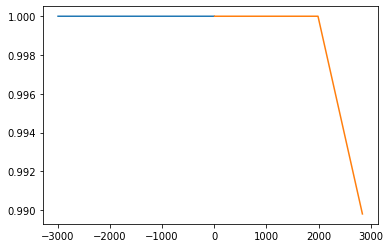

In [16]:
r_data = (r_transitions, 1 - normalized_boltzmann_pop[0,:-1])
p_data = (p_transitions, 1 - normalized_boltzmann_pop[0,1:])

plt.plot(*r_data)
plt.plot(*p_data)

## Generating A Spectrum

In [17]:
levels

array([[ 7.50000e-01, -2.25000e+00, -3.22500e+01, -1.37250e+02,
        -3.89250e+02, -8.84250e+02, -1.74225e+03, -3.10725e+03,
        -5.14725e+03, -8.05425e+03],
       [ 3.75000e+00, -1.25000e+00, -3.52500e+01, -1.46250e+02,
        -4.06250e+02, -9.11250e+02, -1.78125e+03, -3.16025e+03,
        -5.21625e+03, -8.14125e+03],
       [ 8.75000e+00,  1.75000e+00, -3.62500e+01, -1.53250e+02,
        -4.21250e+02, -9.36250e+02, -1.81825e+03, -3.21125e+03,
        -5.28325e+03, -8.22625e+03],
       [ 1.57500e+01,  6.75000e+00, -3.52500e+01, -1.58250e+02,
        -4.34250e+02, -9.59250e+02, -1.85325e+03, -3.26025e+03,
        -5.34825e+03, -8.30925e+03],
       [ 2.47500e+01,  1.37500e+01, -3.22500e+01, -1.61250e+02,
        -4.45250e+02, -9.80250e+02, -1.88625e+03, -3.30725e+03,
        -5.41125e+03, -8.39025e+03],
       [ 3.57500e+01,  2.27500e+01, -2.72500e+01, -1.62250e+02,
        -4.54250e+02, -9.99250e+02, -1.91725e+03, -3.35225e+03,
        -5.47225e+03, -8.46925e+03],
       [ 4

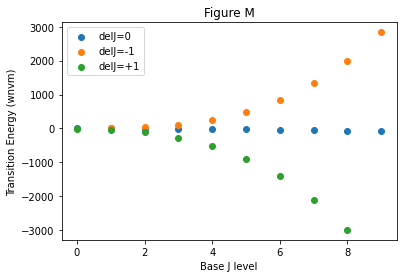

In [18]:
plt.clf()
plt.scatter(np.arange(J_max), levels[1,:] - levels[0,:])
plt.scatter(np.arange(1, J_max), p_transitions)
plt.scatter(np.arange(J_max -1), r_transitions)
plt.legend(['delJ=0',
            'delJ=-1',
            'delJ=+1'])
plt.xlabel('Base J level')
plt.ylabel('Transition Energy (wnvm)')
plt.title('Figure M')
plt.show()

### Description of Generated Spectrum
A spectrum will be generated as a sum of gaussians centered at each transition wavelength, with relative heights of the boltzmann weight of their base level.
$$
f(λ) = W_b e^\frac{-(λ - λ_0)^2}{2\sigma^2}
$$
With σ as an empirical bandwidth parameter.

In [19]:
#Define a Gaussian
Gaussian = lambda x, a, b, c : a*np.exp(-1*(x-b)**2 / (2*c**2))

In [20]:
#Define Coefficients
r_coeffs = normalized_boltzmann_pop[0,:-1] # Values of base levels where dJ += 1 is possible
p_coeffs = normalized_boltzmann_pop[0,1:] # Values of base levels where dJ -= 1 is possible

In [21]:
r_transitions[::-1], r_coeffs

(array([-2.994e+03, -2.109e+03, -1.418e+03, -8.970e+02, -5.220e+02,
        -2.690e+02, -1.140e+02, -3.300e+01, -2.000e+00]),
 array([1.70277463e-19, 1.72745085e-19, 1.99476154e-19, 3.30057410e-19,
        1.10526365e-18, 1.18706119e-17, 7.27029914e-16, 5.06562209e-13,
        8.98736181e-09]))

In [22]:
p_transitions[::-1], p_coeffs

(array([2838., 1987., 1326.,  831.,  478.,  243.,  102.,   31.,    6.]),
 array([1.72745085e-19, 1.99476154e-19, 3.30057410e-19, 1.10526365e-18,
        1.18706119e-17, 7.27029914e-16, 5.06562209e-13, 8.98736181e-09,
        1.01966245e-02]))

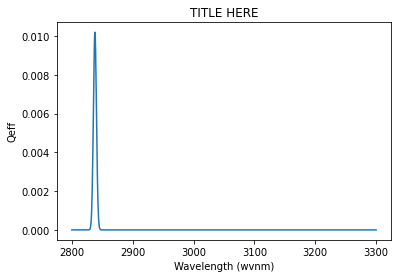

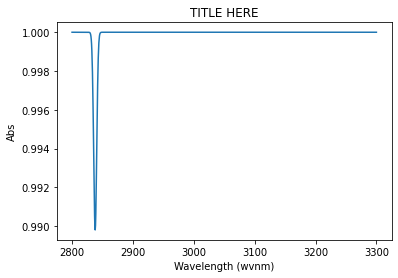

In [23]:
domain = np.linspace(2800,3300,1000)
sigma = 2.5

r_excitation_data = np.array([[Gaussian(domain, W_b, l_c, sigma) for W_b in r_coeffs] for l_c in r_transitions])
p_excitation_data = np.array([[Gaussian(domain, W_b, l_c, sigma) for W_b in p_coeffs] for l_c in p_transitions])

excitation_data = []
for i in range(r_excitation_data.shape[0]):
  excitation_data.append(r_excitation_data[i,i,:])
  excitation_data.append(p_excitation_data[i,i,:])
excitation_data = np.array(excitation_data)

plot_data('TITLE HERE', domain, excitation_data.sum(0), 'Wavelength (wvnm)', 'Qeff')
plot_data('TITLE HERE', domain, 1 - excitation_data.sum(0), 'Wavelength (wvnm)', 'Abs')

## Graph Real Data

In [24]:
#Obtain jcampdx from NIST, a common IR file format at
# https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C7647010&Index=0&Type=IR
# Save it to your google drive and point to it here
from IPython.testing import test
from google.colab import drive
drive.mount('/content/drive')
##################################################################
hcl_jcamp = '/content/drive/MyDrive/7647-01-0-IR.jdx'
#%cat $hcl_jcamp

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
def get_jcamp_data(jcamp_fn):
  with open(jcamp_fn, 'r') as w:
    lines = [line[:-1] if line.endswith('\n') else line for line in w.readlines()]
  #print(lines)
  data_start = lines.index("##XYDATA=(X++(Y..Y))") + 1
  data_end = lines.index("##END=")
  #Data is averaged some number of times
  data_lines = lines[data_start:data_end]
  data = np.array([[float(element) for element in line.split(' ')] for line in data_lines])
  x_data = data[:,0]
  y_data = np.average(data[:,1:],1)
  return x_data, y_data


plt.clf()
#Now you plot data from NIST below this comment

plt.show()

<Figure size 432x288 with 0 Axes>

## Questions

### Edit this text cell to write your answers to the following questions below each question.

#### Explain the purpose of prefixes like np. and cons.

#### Explain the meaning/contribution of each term in the equation for T (from equation 4).

#### How does the boltzmann population differ between rotational and vibrational energy levels?  Are either well dispersed/isolated?

#### How do we know if we are using enough boltzmann levels to describe the molecular energy landscape?

#### Describe the selection rules for spectroscopy and the R and P branches.  Which is higher energy?  Why is there a "forbidden transition" between the two branches?

#### This is, principally, a single molecule analysis.  What effects or interactions that we have not described here can occur to a molecule present in a bulk/ensemble?

#### Describe and explain the behavior of Figure M.

#### How well does this analysis fit/mimick real spectroscopic data?

#### At what pressure of HCl was the spectrum from the NIST link taken?  What parameters were used in cell 8 from NIST?

#### What (in your opinion) was the best assumption made in this analysis?

#### What (in your opinion) was the worst assumption made in this analysis?
